In [28]:
%load_ext autoreload
%autoreload 2

#modules for setting the path
import os
import sys
module_path = os.path.abspath(os.path.join(os.pardir, os.pardir))
if module_path not in sys.path:
    sys.path.append(module_path)

#modules for opening the data
import psycopg2
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from matplotlib.ticker import MaxNLocator

#Retrieving postgres info
from src.data import local
PORT = local.port
USER = local.user
HOST = local.host
PASSWORD = local.password

DBNAME = "opportunity_youth"

The autoreload extension is already loaded. To reload it, use:
  %reload_ext autoreload


In [29]:
conn = psycopg2.connect(dbname=DBNAME, user=USER, password=PASSWORD, port=PORT, host=HOST)

In [30]:
query = """
            SELECT p.puma10, rtrim(puma_name), agep,
                        CASE WHEN p.sex = '1' THEN 'male'
                 ELSE 'female'
                 END as gender,
            CASE WHEN p.racasn = '1' THEN 'asian'
                 WHEN p.racblk = '1' THEN 'black or African American'
                 WHEN p.racwht = '1' THEN 'white'
                 WHEN p.hisp <> '1' THEN 'hispanic'
                 END as race_or_ethnicity,
            CASE WHEN p.sch = '1' THEN 'Has not attended in last 3 months'
                 WHEN p.sch IN ('2','3') THEN 'public or private school or college and homeschool'
                 END as School,
            CASE WHEN p.schl in ('16','17') THEN 'HS diploma or GED'
                 WHEN p.schl in ('18','19','20','21','22','23','24') THEN 'post HS education'
                 ELSE 'No HS or GED'
                 END as Education_attainment,
            CASE WHEN p.esr in ('1','2') THEN 'employed'
                 WHEN p.esr in ('3','6') THEN 'Unemployed/not in labor force'
                 WHEN p.esr IN ('4','5') THEN 'Armed Forces'
                 END as Employment_status,
            CASE WHEN p.dis = '1' THEN 'reported disability'
                 ELSE 'no reported disability'
                 END as disability_status,
            CASE WHEN p.ddrs = '1' THEN 'Self-care difficulty'
                 WHEN p.dear = '1' THEN 'Hearing difficulty'
                 WHEN p.deye = '1' THEN 'Vision difficulty'
                 WHEN p.dphy = '1' THEN 'Ambulatory difficulty'
                 WHEN p.drem = '1' THEN 'Cognitive difficulty'
                 ELSE 'None reported'
                 END as disability_type,
            CASE WHEN p.cit IN ('1','2','3','4') THEN 'US Citizen'
                 WHEN p.cit = '5' THEN 'Not US Citizen'
                 END as Citizenship,
            CASE WHEN p.eng IN ('3','4') THEN 'Poor or No English language'
                 ELSE 'English Speaker'
                 END as English_language,
            CASE WHEN p.wkl = '1' THEN 'employed in the last year'
                 WHEN p.wkl in ('2','3') THEN 'not employed in the last year'
                 END AS last_employed,
            CASE WHEN p.esp in ('1','2','3','5','6','7','8') THEN 'One or both parents in labor force'
                 WHEN p.esp = '4' THEN 'Neither parent in labor force'
                 END as Parent_employment,
            CASE WHEN p.mar = '1' THEN 'married'
                 WHEN p.mar = '5' THEN 'never married'
                 ELSE 'divorced, widowed, or separated'
                 END as marital_status,
            CASE WHEN p.fer = '1' THEN 'yes'
                 END AS Child_born_las_year,
            CASE WHEN p.paoc in ('1','2','3') THEN 'own child(ren)'
                 ELSE 'no own children'
                 END as Presence_of_children,
            CASE WHEN p.mig = '1' THEN 'lived here last year'
                 ELSE 'moved here last year'
                 END AS Moved,
            CASE WHEN p.hicov = '1' THEN 'yes'
                 ELSE 'no'
                 END as Has_Health_Insurance,
            pap as Public_Assistance_Income_past_year,
            pwgtp as Weight
            FROM pums_2014 p
            JOIN puma_names_2010 n on p.puma10 = n.puma
            WHERE state_name = 'Washington'
            AND p.puma10 IN ('11610', '11611', '11612', '11613', '11614', '11615')
            AND agep BETWEEN 16 AND 24
            ORDER BY school, agep DESC"""
            
SKC_youth_2014 = pd.read_sql(query, conn)
SKC_youth_2014.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2081 entries, 0 to 2080
Data columns (total 21 columns):
 #   Column                              Non-Null Count  Dtype  
---  ------                              --------------  -----  
 0   puma10                              2081 non-null   object 
 1   rtrim                               2081 non-null   object 
 2   agep                                2081 non-null   float64
 3   gender                              2081 non-null   object 
 4   race_or_ethnicity                   2081 non-null   object 
 5   school                              2081 non-null   object 
 6   education_attainment                2081 non-null   object 
 7   employment_status                   2081 non-null   object 
 8   disability_status                   2081 non-null   object 
 9   disability_type                     2081 non-null   object 
 10  citizenship                         2081 non-null   object 
 11  english_language                    2081 no

In [31]:
query = """
            SELECT p.puma, rtrim(puma_name), agep,
                        CASE WHEN p.sex = '1' THEN 'male'
                 ELSE 'female'
                 END as gender,
            CASE WHEN p.racasn = '1' THEN 'asian'
                 WHEN p.racblk = '1' THEN 'black or African American'
                 WHEN p.racwht = '1' THEN 'white'
                 WHEN p.hisp <> '1' THEN 'hispanic'
                 END as race_or_ethnicity,
            CASE WHEN p.sch = '1' THEN 'Has not attended in last 3 months'
                 WHEN p.sch IN ('2','3') THEN 'public or private school or college and homeschool'
                 END as School,
            CASE WHEN p.schl in ('16','17') THEN 'HS diploma or GED'
                 WHEN p.schl in ('18','19','20','21','22','23','24') THEN 'post HS education'
                 ELSE 'No HS or GED'
                 END as Education_attainment,
            CASE WHEN p.esr in ('1','2') THEN 'employed'
                 WHEN p.esr in ('3','6') THEN 'Unemployed/not in labor force'
                 WHEN p.esr IN ('4','5') THEN 'Armed Forces'
                 END as Employment_status,
            CASE WHEN p.dis = '1' THEN 'reported disability'
                 ELSE 'no reported disability'
                 END as disability_status,
            CASE WHEN p.ddrs = '1' THEN 'Self-care difficulty'
                 WHEN p.dear = '1' THEN 'Hearing difficulty'
                 WHEN p.deye = '1' THEN 'Vision difficulty'
                 WHEN p.dphy = '1' THEN 'Ambulatory difficulty'
                 WHEN p.drem = '1' THEN 'Cognitive difficulty'
                 ELSE 'None reported'
                 END as disability_type,
            CASE WHEN p.cit IN ('1','2','3','4') THEN 'US Citizen'
                 WHEN p.cit = '5' THEN 'Not US Citizen'
                 END as Citizenship,
            CASE WHEN p.eng IN ('3','4') THEN 'Poor or No English language'
                 ELSE 'English Speaker'
                 END as English_language,
            CASE WHEN p.wkl = '1' THEN 'employed in the last year'
                 WHEN p.wkl in ('2','3') THEN 'not employed in the last year'
                 END AS last_employed,
            CASE WHEN p.esp in ('1','2','3','5','6','7','8') THEN 'One or both parents in labor force'
                 WHEN p.esp = '4' THEN 'Neither parent in labor force'
                 END as Parent_employment,
            CASE WHEN p.mar = '1' THEN 'married'
                 WHEN p.mar = '5' THEN 'never married'
                 ELSE 'divorced, widowed, or separated'
                 END as marital_status,
            CASE WHEN p.fer = '1' THEN 'yes'
                 END AS Child_born_las_year,
            CASE WHEN p.paoc in ('1','2','3') THEN 'own child(ren)'
                 ELSE 'no own children'
                 END as Presence_of_children,
            CASE WHEN p.mig = '1' THEN 'lived here last year'
                 ELSE 'moved here last year'
                 END AS Moved,
            CASE WHEN p.hicov = '1' THEN 'yes'
                 ELSE 'no'
                 END as Has_Health_Insurance,
            pap as Public_Assistance_Income_past_year,
            pwgtp as Weight
            FROM pums_2017 p
            JOIN puma_names_2010 n on p.puma = n.puma
            WHERE state_name = 'Washington'
            AND p.puma IN ('11610', '11611', '11612', '11613', '11614', '11615')
            AND agep BETWEEN 16 AND 24
            ORDER BY school, agep DESC"""
            
SKC_youth_2017 = pd.read_sql(query, conn)
SKC_youth_2017.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3482 entries, 0 to 3481
Data columns (total 21 columns):
 #   Column                              Non-Null Count  Dtype  
---  ------                              --------------  -----  
 0   puma                                3482 non-null   object 
 1   rtrim                               3482 non-null   object 
 2   agep                                3482 non-null   float64
 3   gender                              3482 non-null   object 
 4   race_or_ethnicity                   3482 non-null   object 
 5   school                              3482 non-null   object 
 6   education_attainment                3482 non-null   object 
 7   employment_status                   3482 non-null   object 
 8   disability_status                   3482 non-null   object 
 9   disability_type                     3482 non-null   object 
 10  citizenship                         3482 non-null   object 
 11  english_language                    3482 no

In [32]:
query = """
            SELECT p.puma, rtrim(puma_name), agep,
                        CASE WHEN p.sex = '1' THEN 'male'
                 ELSE 'female'
                 END as gender,
            CASE WHEN p.racasn = '1' THEN 'asian'
                 WHEN p.racblk = '1' THEN 'black or African American'
                 WHEN p.racwht = '1' THEN 'white'
                 WHEN p.hisp <> '1' THEN 'hispanic'
                 END as race_or_ethnicity,
            CASE WHEN p.sch = '1' THEN 'Has not attended in last 3 months'
                 WHEN p.sch IN ('2','3') THEN 'public or private school or college and homeschool'
                 END as School,
            CASE WHEN p.schl in ('16','17') THEN 'HS diploma or GED'
                 WHEN p.schl in ('18','19','20','21','22','23','24') THEN 'post HS education'
                 ELSE 'No HS or GED'
                 END as Education_attainment,
            CASE WHEN p.esr in ('1','2') THEN 'employed'
                 WHEN p.esr in ('3','6') THEN 'Unemployed/not in labor force'
                 WHEN p.esr IN ('4','5') THEN 'Armed Forces'
                 END as Employment_status,
            CASE WHEN p.dis = '1' THEN 'reported disability'
                 ELSE 'no reported disability'
                 END as disability_status,
            CASE WHEN p.ddrs = '1' THEN 'Self-care difficulty'
                 WHEN p.dear = '1' THEN 'Hearing difficulty'
                 WHEN p.deye = '1' THEN 'Vision difficulty'
                 WHEN p.dphy = '1' THEN 'Ambulatory difficulty'
                 WHEN p.drem = '1' THEN 'Cognitive difficulty'
                 ELSE 'None reported'
                 END as disability_type,
            CASE WHEN p.cit IN ('1','2','3','4') THEN 'US Citizen'
                 WHEN p.cit = '5' THEN 'Not US Citizen'
                 END as Citizenship,
            CASE WHEN p.eng IN ('3','4') THEN 'Poor or No English language'
                 ELSE 'English Speaker'
                 END as English_language,
            CASE WHEN p.wkl = '1' THEN 'employed in the last year'
                 WHEN p.wkl in ('2','3') THEN 'not employed in the last year'
                 END AS last_employed,
            CASE WHEN p.esp in ('1','2','3','5','6','7','8') THEN 'One or both parents in labor force'
                 WHEN p.esp = '4' THEN 'Neither parent in labor force'
                 END as Parent_employment,
            CASE WHEN p.mar = '1' THEN 'married'
                 WHEN p.mar = '5' THEN 'never married'
                 ELSE 'divorced, widowed, or separated'
                 END as marital_status,
            CASE WHEN p.fer = '1' THEN 'yes'
                 END AS Child_born_las_year,
            CASE WHEN p.paoc in ('1','2','3') THEN 'own child(ren)'
                 ELSE 'no own children'
                 END as Presence_of_children,
            CASE WHEN p.mig = '1' THEN 'lived here last year'
                 ELSE 'moved here last year'
                 END AS Moved,
            CASE WHEN p.hicov = '1' THEN 'yes'
                 ELSE 'no'
                 END as Has_Health_Insurance,
            pap as Public_Assistance_Income_past_year,
            pwgtp as Weight
            FROM pums_2018 p
            JOIN puma_names_2010 n on p.puma = n.puma
            WHERE state_name = 'Washington'
            AND p.puma IN ('11610', '11611', '11612', '11613', '11614', '11615')
            AND agep BETWEEN 16 AND 24
            ORDER BY school, agep DESC"""
            
SKC_youth_2018 = pd.read_sql(query, conn)
SKC_youth_2018.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3463 entries, 0 to 3462
Data columns (total 21 columns):
 #   Column                              Non-Null Count  Dtype  
---  ------                              --------------  -----  
 0   puma                                3463 non-null   object 
 1   rtrim                               3463 non-null   object 
 2   agep                                3463 non-null   float64
 3   gender                              3463 non-null   object 
 4   race_or_ethnicity                   3463 non-null   object 
 5   school                              3463 non-null   object 
 6   education_attainment                3463 non-null   object 
 7   employment_status                   3463 non-null   object 
 8   disability_status                   3463 non-null   object 
 9   disability_type                     3463 non-null   object 
 10  citizenship                         3463 non-null   object 
 11  english_language                    3463 no

In [33]:
def compare_across_years(variable_and_status, df_1, df_2, df_3):
    #takes a tuple, variable_and_status, that is compsed of the variable column you want to check 
    #and the status which you want to compare. Also takes the data frame you want to look at.
    variable = variable_and_status[0]
    status = variable_and_status[1]
    
    total_1 = df_1.weight.sum()
    var_total_1 = df_1[df_1[variable] == status].weight.sum()
    prct_1 = var_total_1/total_1
    
    total_2 = df_2.weight.sum()
    var_total_2 = df_2[df_2[variable] == status].weight.sum()
    prct_2 = var_total_2/total_2
    
    total_3 = df_3.weight.sum()
    var_total_3 = df_3[df_3[variable] == status].weight.sum()
    prct_3 = var_total_3/total_3
    
    return (prct_1, prct_2, prct_3)

In [34]:
OY_df_2014 = SKC_youth_2014[(SKC_youth_2014['employment_status']=='Unemployed/not in labor force')&
                       (SKC_youth_2014['school']=='Has not attended in last 3 months')]
OY_prct_2014 = OY_df_2014.weight.sum()/SKC_youth_2014.weight.sum()

In [35]:
OY_df_2017 = SKC_youth_2017[(SKC_youth_2017['employment_status']=='Unemployed/not in labor force')&
                       (SKC_youth_2017['school']=='Has not attended in last 3 months')]
OY_prct_2017 = OY_df_2017.weight.sum()/SKC_youth_2017.weight.sum()

In [36]:
OY_df_2018 = SKC_youth_2018[(SKC_youth_2018['employment_status']=='Unemployed/not in labor force')&
                       (SKC_youth_2018['school']=='Has not attended in last 3 months')]
OY_prct_2018 = OY_df_2018.weight.sum()/SKC_youth_2018.weight.sum()

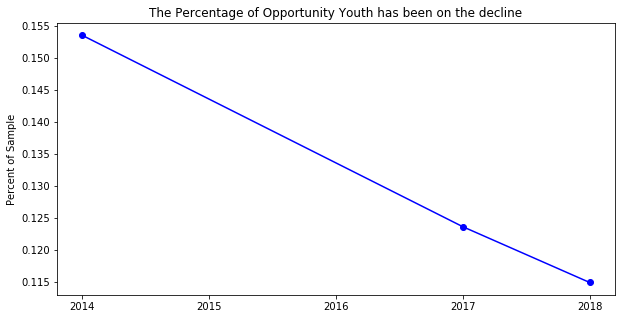

In [43]:
x_var = [2014, 2017, 2018]
y_var = [OY_prct_2014, OY_prct_2017, OY_prct_2018]

fig, ax = plt.subplots(1,1, figsize=(10,5))

ax.set_title('The Percentage of Opportunity Youth has been on the decline')
ax.set_ylabel('Percent of Sample')

ax.xaxis.set_major_locator(MaxNLocator(integer=True))

ax.plot(x_var, y_var, marker='o', color='b')


# fig.savefig('percent_of_OY_youth.png')

In [58]:
def line_across_years(variable_and_status, df_1, df_2, df_3):
    OY_df_1 = df_1[(df_1['employment_status']=='Unemployed/not in labor force')&
                       (df_1['school']=='Has not attended in last 3 months')]
    OY_df_2 = df_2[(df_2['employment_status']=='Unemployed/not in labor force')&
                       (df_2['school']=='Has not attended in last 3 months')]
    OY_df_3 = df_3[(df_3['employment_status']=='Unemployed/not in labor force')&
                       (df_3['school']=='Has not attended in last 3 months')]
    
    x_var = [2014, 2017, 2018]
    
    y_var_oy = compare_across_years(variable_and_status, OY_df_1, OY_df_2, OY_df_3)

    y_var_total = compare_across_years(variable_and_status, df_1, df_2, df_3)
    
    
    fig, ax = plt.subplots(1,1, figsize=(10,5))

    ax.set_title(f'Rate of {variable_and_status[0]}: {variable_and_status[1]} in Opportunity Youth Compared to Total Youth')
    ax.set_ylabel('Percent of Sample')

    ax.xaxis.set_major_locator(MaxNLocator(integer=True))
    ax.plot(x_var, y_var_total, marker='o', color='g', label='Total Youth')
    ax.plot(x_var, y_var_oy, marker='o', color='b', label='Opportunity Youth')
    ax.legend()
    fig.savefig(variable_and_status[0]+'.png')

In [59]:
variables = ['gender', 'education_attainment', 'disability_status', 'citizenship', 'english_language', 'parent_employment', 'marital_status', 'child_born_las_year', 'presence_of_children', 'moved', 'has_health_insurance']
status = ['female', 'No HS or GED', 'reported disability', 'Not US Citizen', 'Poor or No English language', 'One or both parents in labor force', 'married', 'yes', 'own child(ren)', 'moved here last year', 'no']
variable_and_status_list = list(zip(variables, status))

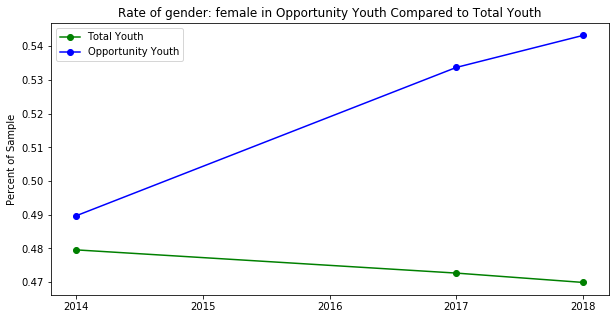

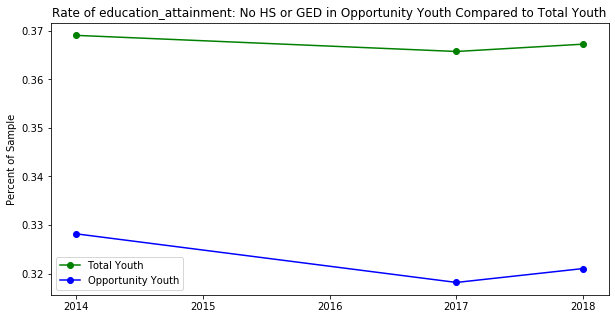

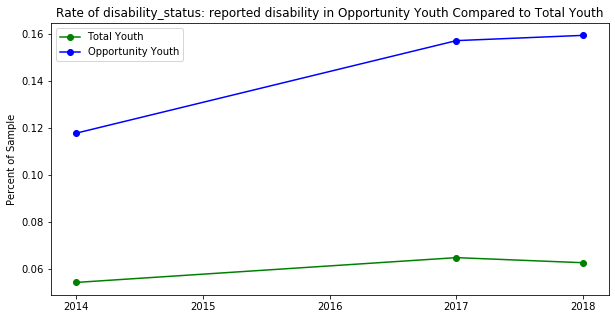

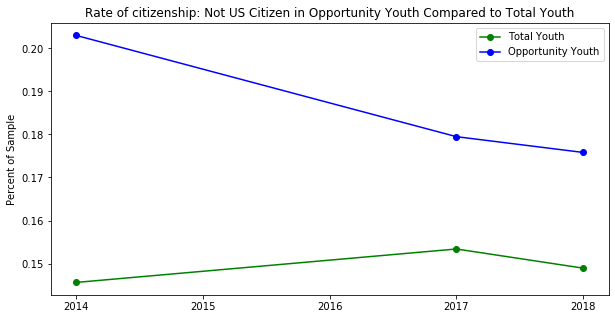

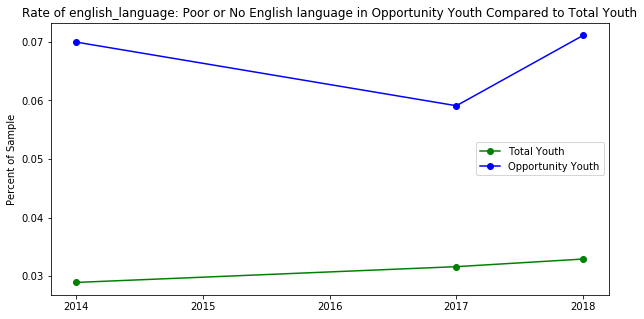

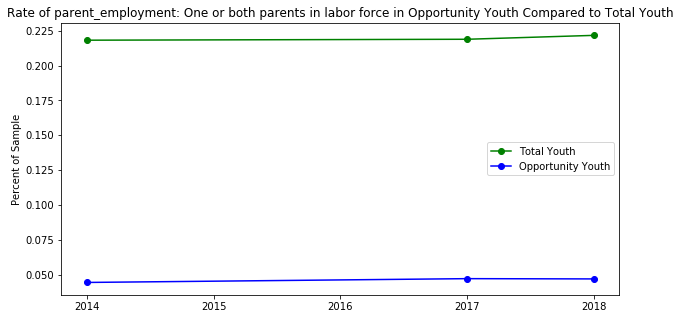

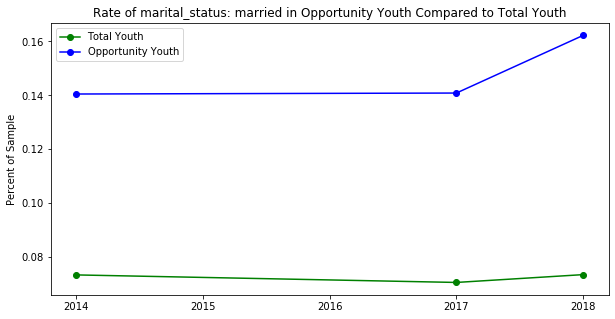

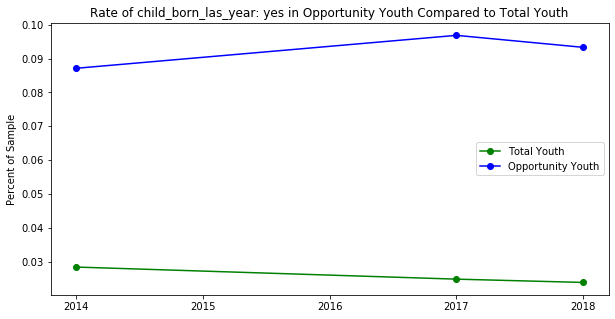

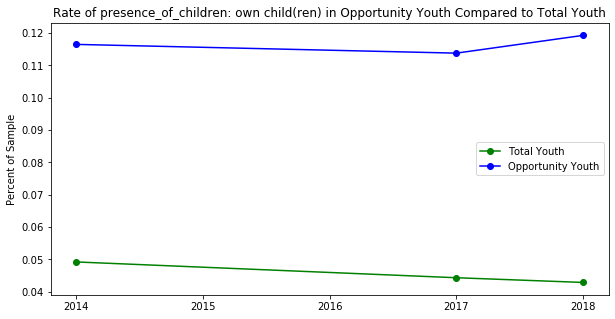

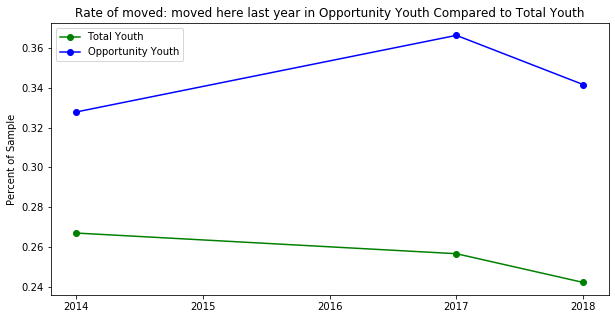

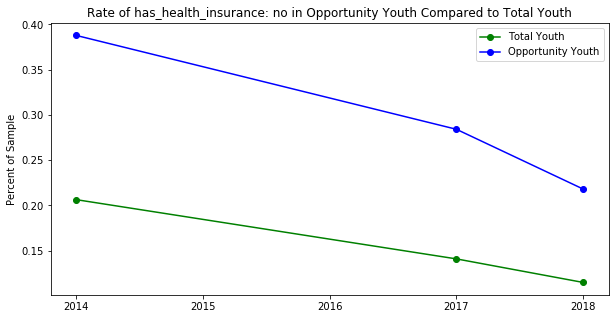

In [60]:
for variable_and_status in variable_and_status_list:
    line_across_years(variable_and_status, SKC_youth_2014, SKC_youth_2017, SKC_youth_2018)

In [65]:
SKC_youth_2017[SKC_youth_2017['education_attainment'] == 'post HS education'].info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 1283 entries, 1 to 3432
Data columns (total 21 columns):
 #   Column                              Non-Null Count  Dtype  
---  ------                              --------------  -----  
 0   puma                                1283 non-null   object 
 1   rtrim                               1283 non-null   object 
 2   agep                                1283 non-null   float64
 3   gender                              1283 non-null   object 
 4   race_or_ethnicity                   1283 non-null   object 
 5   school                              1283 non-null   object 
 6   education_attainment                1283 non-null   object 
 7   employment_status                   1283 non-null   object 
 8   disability_status                   1283 non-null   object 
 9   disability_type                     1283 non-null   object 
 10  citizenship                         1283 non-null   object 
 11  english_language                    1283 no

In [66]:
def compare(variable_and_status, df_1, df_2):
    #takes a tuple, variable_and_status, that is compsed of the variable column you want to check 
    #and the status which you want to compare. Also takes the data frame you want to look at.
    variable = variable_and_status[0]
    status = variable_and_status[1]
    
    total_1 = df_1.weight.sum()
    var_total_1 = df_1[df_1[variable] == status].weight.sum()
    prct_1 = var_total_1/total_1
    
    total_2 = df_2.weight.sum()
    var_total_2 = df_2[df_2[variable] == status].weight.sum()
    prct_2 = var_total_2/total_2
    
    return (prct_1, prct_2)

In [120]:
def create_graph(variable_and_status, df_1, df_2, col_names=['1','2'], title='title'):
    prct_tuple = compare(variable_and_status, df_1, df_2)

    height_values = prct_tuple

    fig, ax1 = plt.subplots(1,1, figsize=(8,8))
    ax1.set_title(title, fontsize=14)
    
    ax1.set_ylabel('Percent of Sample')
    sns.barplot(x=col_names, y=height_values, palette="deep", ax=ax1)
#     ax1.bar(x=col_names, height=height_values)
    fig.savefig(variable_and_status[0]+'.png')

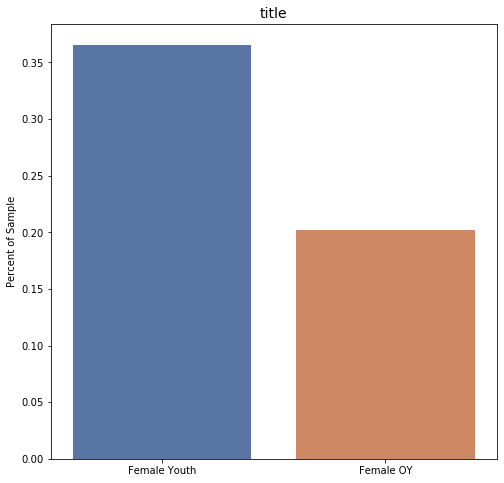

In [121]:
create_graph(('education_attainment', 'post HS education'), SKC_youth_2017, OY_df_2017, ['Female Youth', 'Female OY'])

In [122]:
SKC_youth_2017_f = SKC_youth_2017[SKC_youth_2017['gender'] == 'female']
OY_df_2017_f = OY_df_2017[OY_df_2017['gender'] == 'female']

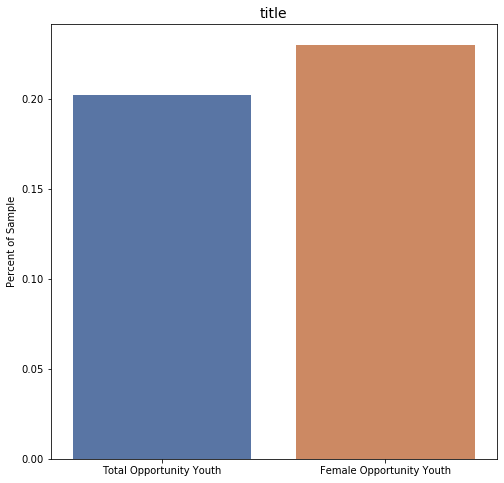

In [123]:
create_graph(('education_attainment', 'post HS education'), OY_df_2017, OY_df_2017_f, ['Total Opportunity Youth', 'Female Opportunity Youth'])

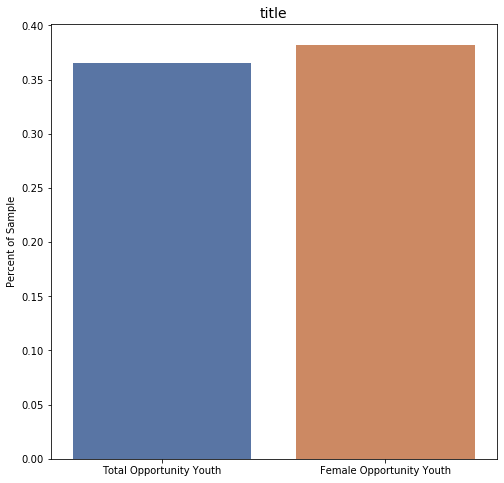

In [124]:
create_graph(('education_attainment', 'post HS education'), SKC_youth_2017, SKC_youth_2017_f, ['Total Opportunity Youth', 'Female Opportunity Youth'])

In [125]:
SKC_youth_2017_f_c = SKC_youth_2017_f[SKC_youth_2017_f['education_attainment'] == 'post HS education']
OY_df_2017_f_c = OY_df_2017_f[OY_df_2017_f['education_attainment'] == 'post HS education']

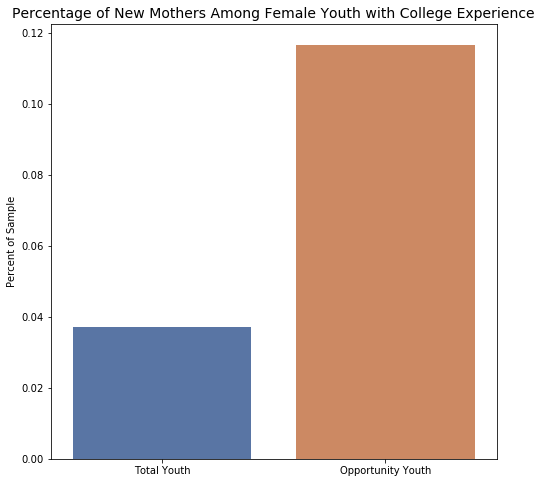

In [126]:
create_graph(('child_born_las_year', 'yes'), SKC_youth_2017_f_c, OY_df_2017_f_c, ['Total Youth', 'Opportunity Youth'], 'Percentage of New Mothers Among Female Youth with College Experience')